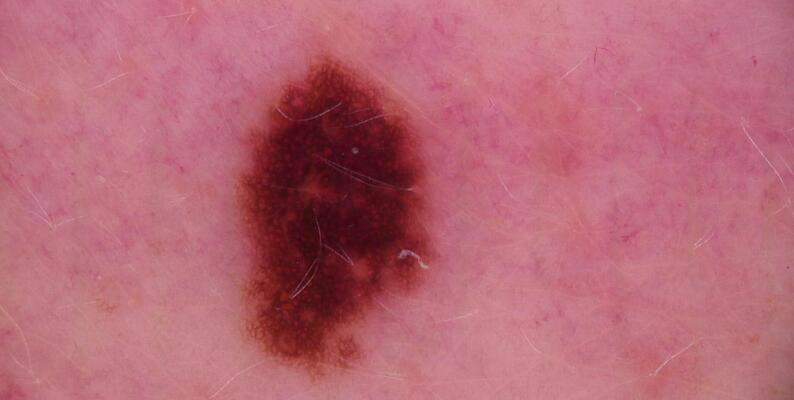

# About the data

Melanoma Skin Cancer Dataset contains 10000 images. Melanoma skin cancer is deadly cancer, early detection and cure can save many lives. This dataset will be useful for developing the deep learning models for accurate classification of melanoma. Dataset consists of 9600 images for training the model and 1000 images for evaluation of model.This dataset contains two classes of melanoma cancer, malignant and benign

# Data loading and exploring

In [ ]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import seaborn as sns
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model
import tensorflow as ts 
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [ ]:
train_dir = "/content/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train"
skin = os.listdir(train_dir)

In [ ]:
skin

['benign', 'malignant']

# Train Data

In [ ]:
# Number of images for each disease
nums_train = {}
nums_val = {}
for s in skin:
    nums_train[s] = len(os.listdir(train_dir + '/' + s))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


,no. of images
benign,5000
malignant,4605


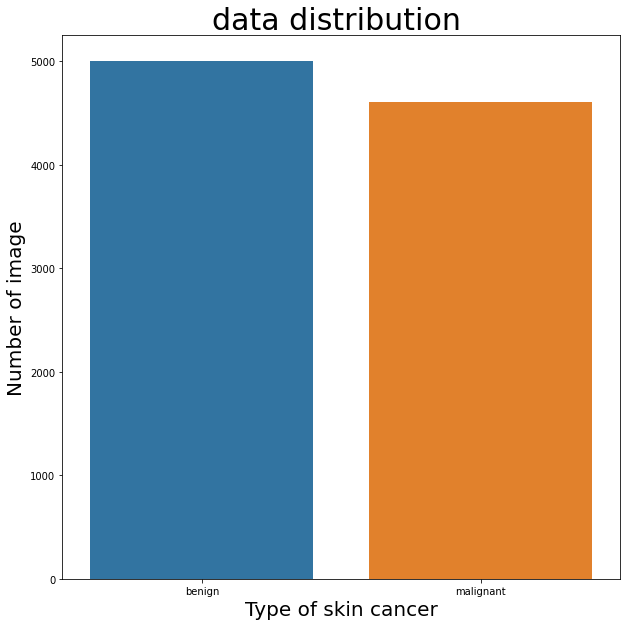

In [ ]:
plt.figure(figsize=(10,10))
plt.title('data distribution ',fontsize=30)
plt.ylabel('Number of image',fontsize=20)
plt.xlabel('Type of skin cancer',fontsize=20)

keys = list(nums_train.keys())
vals = list(nums_train.values())
sns.barplot(x=keys, y=vals)


# Showing some images from each class
 

In [ ]:
# Function to show image
train = ImageFolder(train_dir, transform=transforms.ToTensor())
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    return image.permute(1, 2, 0)

## Benign

Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)
Label :benign(0)


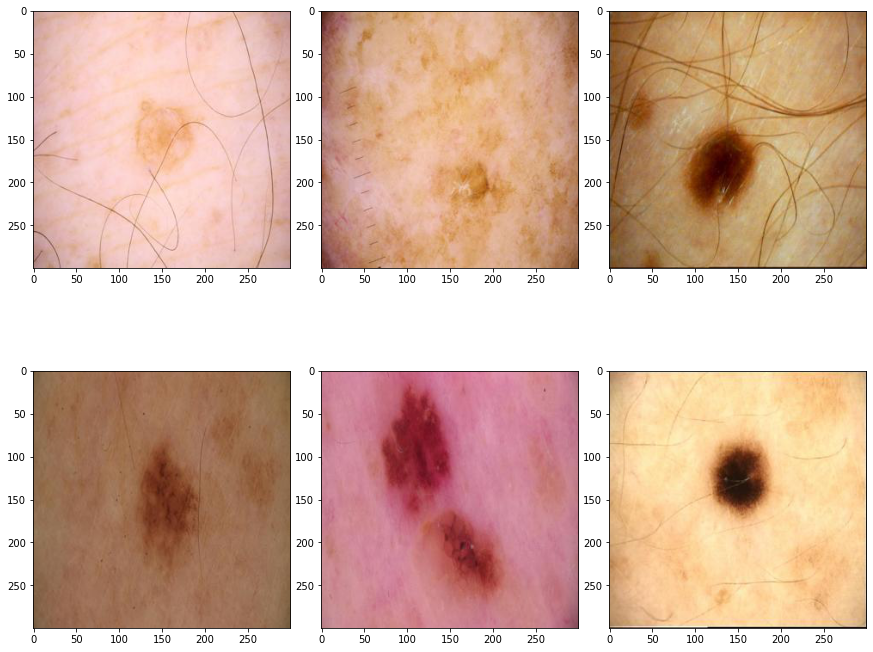

In [ ]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[1]))
axs[0,1].imshow(show_image(*train[260]))
axs[1, 0].imshow(show_image(*train[850]))
axs[1,1].imshow(show_image(*train[930]))
axs[0,2].imshow(show_image(*train[1250]))
axs[1,2].imshow(show_image(*train[1380]))

# Malignant

Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)
Label :malignant(1)


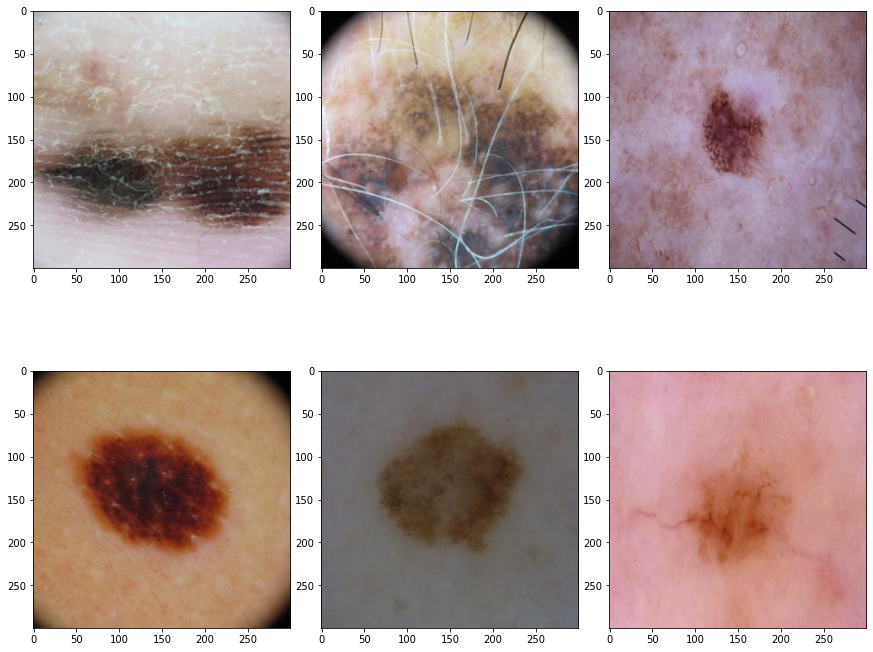

In [ ]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[6000]))
axs[0,1].imshow(show_image(*train[7000]))
axs[1, 0].imshow(show_image(*train[8000]))
axs[1,1].imshow(show_image(*train[9000]))
axs[0,2].imshow(show_image(*train[9500]))
axs[1,2].imshow(show_image(*train[9600]))

# Modeling

In [ ]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                         rotation_range = 20 ,
                                                         horizontal_flip = True ,
                                                         validation_split = 0.25
                                                         )
valid_gen =  keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split = 0.25)
train_data = train_gen.flow_from_directory(train_dir, subset='training', target_size=(224,224), batch_size=64, color_mode='rgb', 
                                            class_mode='categorical', shuffle=True)

test_data = valid_gen.flow_from_directory(train_dir, subset='validation', target_size=(224,224), batch_size=64, color_mode='rgb', 
                                            class_mode='categorical', shuffle=False)


Found 7204 images belonging to 2 classes.
Found 2401 images belonging to 2 classes.


## Model_1

In [ ]:
model_1 = keras.models.Sequential()

model_1.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))

model_1.add(keras.layers.Dropout(0.1))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Conv2D(64, 3, activation='relu'))
model_1.add(keras.layers.Dropout(0.15))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(128, activation='relu'))
model_1.add(keras.layers.Dense(2, activation='softmax'))

model_1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 dropout (Dropout)           (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
history = model_1.fit_generator(train_data,
          validation_data=test_data,
          epochs = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
113/113 [==============================] - 99s 764ms/step - loss: 1.1420 - accuracy: 0.7277 - val_loss: 0.4201 - val_accuracy: 0.8122
Epoch 2/10
113/113 [==============================] - 84s 742ms/step - loss: 0.4105 - accuracy: 0.8236 - val_loss: 0.3314 - val_accuracy: 0.8584
Epoch 3/10
113/113 [==============================] - 85s 752ms/step - loss: 0.3233 - accuracy: 0.8663 - val_loss: 0.3707 - val_accuracy: 0.8455
Epoch 4/10
113/113 [==============================] - 84s 747ms/step - loss: 0.2935 - accuracy: 0.8744 - val_loss: 0.3188 - val_accuracy: 0.8696
Epoch 5/10
113/113 [==============================] - 85s 750ms/step - loss: 0.2835 - accuracy: 0.8835 - val_loss: 0.2741 - val_accuracy: 0.8917
Epoch 6/10
113/113 [==============================] - 83s 737ms/step - loss: 0.2686 - accuracy: 0.8881 - val_loss: 0.2710 - val_accuracy: 0.8809
Epoch 7/10
113/113 [==============================] - 84s 744ms/step - loss: 0.2576 - accuracy: 0.8901 - val_loss: 0.2896 - val_ac

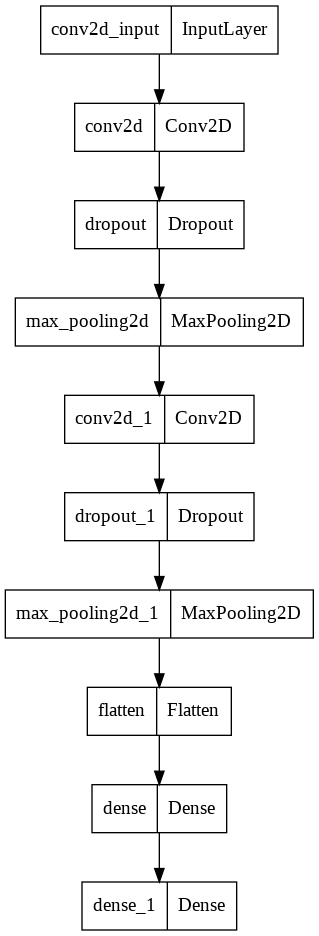

In [ ]:
keras.utils.plot_model(
    model_1,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

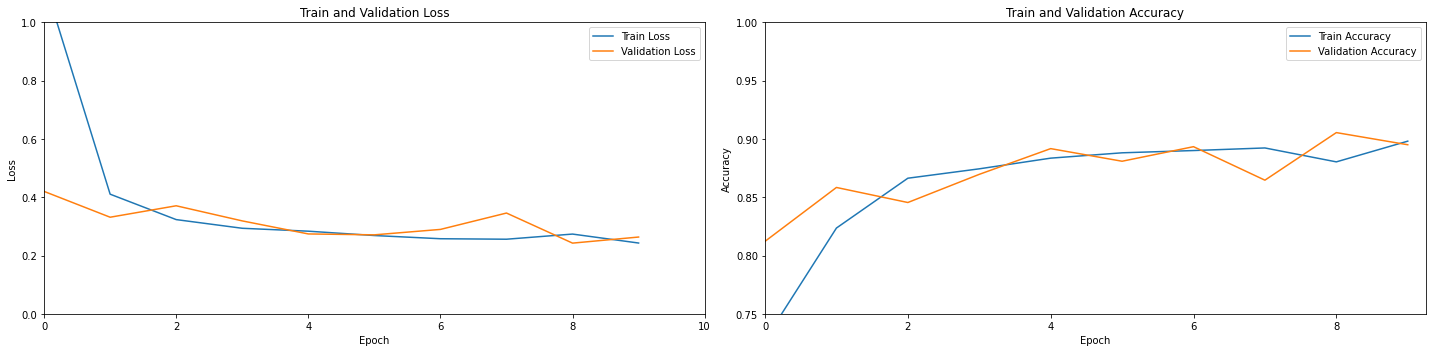

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model_1.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(test_data.classes, y_pred))

38/38 [==============================] - 5s 141ms/step
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1250
           1       0.87      0.91      0.89      1151

    accuracy                           0.90      2401
   macro avg       0.90      0.90      0.90      2401
weighted avg       0.90      0.90      0.90      2401



# Model 2

In [ ]:
model_2 = keras.models.Sequential()

model_2.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))

model_2.add(keras.layers.Dropout(0.1))
model_2.add(keras.layers.MaxPooling2D())

model_2.add(keras.layers.Conv2D(64, 3, activation='relu'))
model_2.add(keras.layers.Dropout(0.15))
model_2.add(keras.layers.MaxPooling2D())

model_2.add(keras.layers.Conv2D(128, 3, activation='relu'))
model_2.add(keras.layers.Dropout(0.2))
model_2.add(keras.layers.MaxPooling2D())

model_2.add(keras.layers.Conv2D(256, 3, activation='relu'))
model_2.add(keras.layers.Dropout(0.3))
model_2.add(keras.layers.MaxPooling2D())

model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dense(512, activation='relu'))
model_2.add(keras.layers.Dense(2, activation='softmax'))

model_2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 dropout_2 (Dropout)         (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 dropout_3 (Dropout)         (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

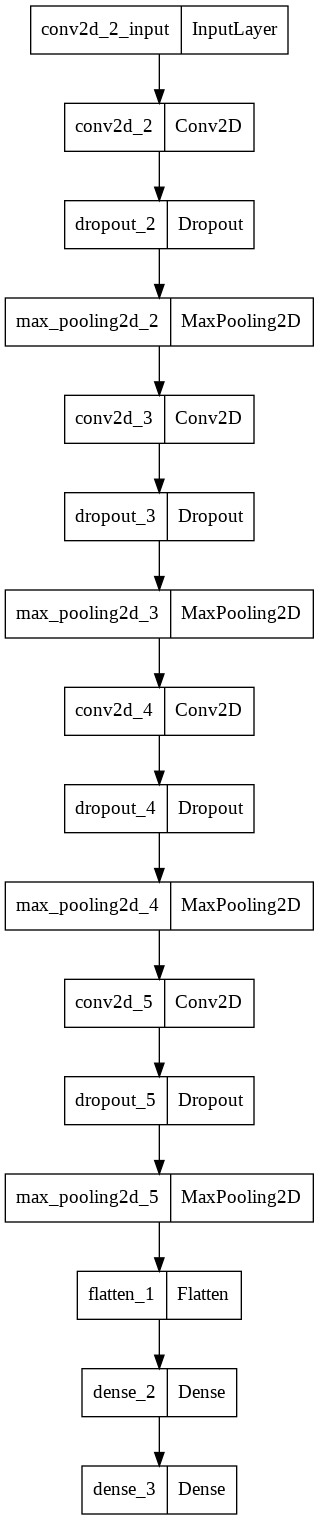

In [ ]:
keras.utils.plot_model(
    model_2,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
history = model_2.fit_generator(train_data,
          validation_data=test_data,
          epochs = 15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
113/113 [==============================] - 87s 756ms/step - loss: 0.6936 - accuracy: 0.6975 - val_loss: 0.4222 - val_accuracy: 0.8663
Epoch 2/15
113/113 [==============================] - 85s 756ms/step - loss: 0.3814 - accuracy: 0.8373 - val_loss: 0.4002 - val_accuracy: 0.8817
Epoch 3/15
113/113 [==============================] - 84s 744ms/step - loss: 0.3317 - accuracy: 0.8609 - val_loss: 0.4829 - val_accuracy: 0.8105
Epoch 4/15
113/113 [==============================] - 85s 755ms/step - loss: 0.3116 - accuracy: 0.8679 - val_loss: 0.3426 - val_accuracy: 0.8892
Epoch 5/15
113/113 [==============================] - 86s 759ms/step - loss: 0.2913 - accuracy: 0.8751 - val_loss: 0.3355 - val_accuracy: 0.8776
Epoch 6/15
113/113 [==============================] - 85s 750ms/step - loss: 0.2793 - accuracy: 0.8813 - val_loss: 0.3616 - val_accuracy: 0.8817
Epoch 7/15
113/113 [==============================] - 87s 769ms/step - loss: 0.2700 - accuracy: 0.8855 - val_loss: 0.3670 - val_ac

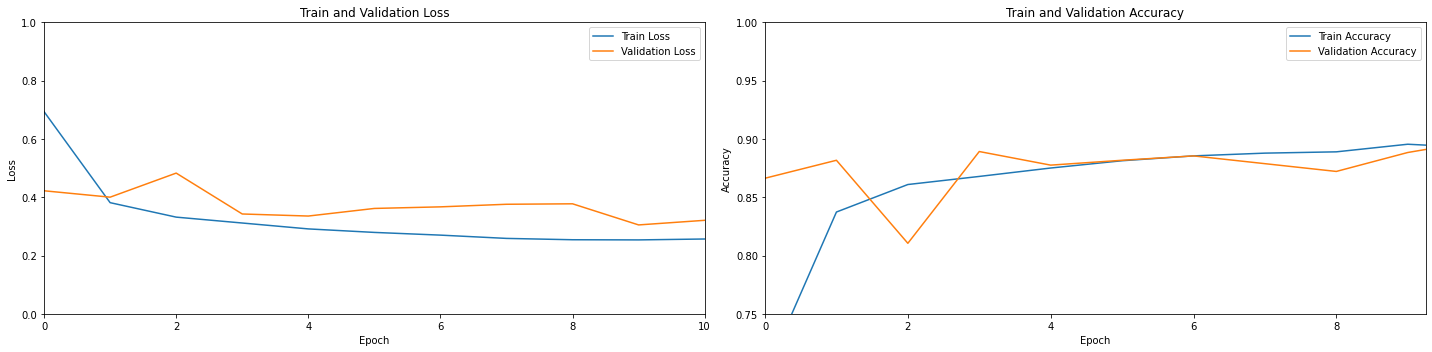

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model_2.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(test_data.classes, y_pred))

38/38 [==============================] - 6s 144ms/step
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1250
           1       0.90      0.91      0.90      1151

    accuracy                           0.91      2401
   macro avg       0.91      0.91      0.91      2401
weighted avg       0.91      0.91      0.91      2401



## Model_3

In [ ]:
model_3 = keras.Sequential()

model_3.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model_3.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.MaxPooling2D(3,3))

model_3.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.MaxPooling2D(3,3))

model_3.add(keras.layers.Flatten())

model_3.add(keras.layers.Dense(128,activation="relu"))
model_3.add(keras.layers.Dropout(0.5))

model_3.add(keras.layers.Dense(2,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model_3.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                  

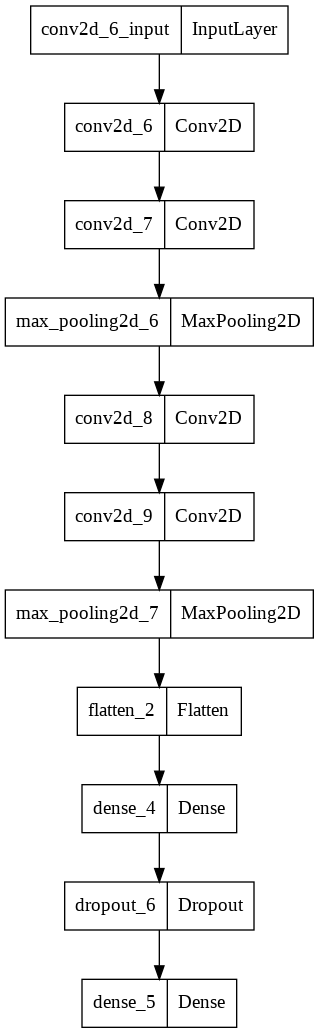

In [ ]:
keras.utils.plot_model(
    model_3,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
history = model_3.fit_generator(train_data,
          validation_data=test_data,
          epochs = 15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
113/113 [==============================] - 91s 778ms/step - loss: 0.5339 - accuracy: 0.7218 - val_loss: 0.3785 - val_accuracy: 0.8359
Epoch 2/15
113/113 [==============================] - 87s 771ms/step - loss: 0.4004 - accuracy: 0.8187 - val_loss: 0.3150 - val_accuracy: 0.8701
Epoch 3/15
113/113 [==============================] - 86s 758ms/step - loss: 0.3435 - accuracy: 0.8534 - val_loss: 0.3102 - val_accuracy: 0.8730
Epoch 4/15
113/113 [==============================] - 85s 752ms/step - loss: 0.3274 - accuracy: 0.8647 - val_loss: 0.2838 - val_accuracy: 0.8809
Epoch 5/15
113/113 [==============================] - 86s 763ms/step - loss: 0.3038 - accuracy: 0.8698 - val_loss: 0.3029 - val_accuracy: 0.8763
Epoch 6/15
113/113 [==============================] - 86s 756ms/step - loss: 0.2909 - accuracy: 0.8777 - val_loss: 0.2448 - val_accuracy: 0.9030
Epoch 7/15
113/113 [==============================] - 86s 762ms/step - loss: 0.2802 - accuracy: 0.8848 - val_loss: 0.2539 - val_ac

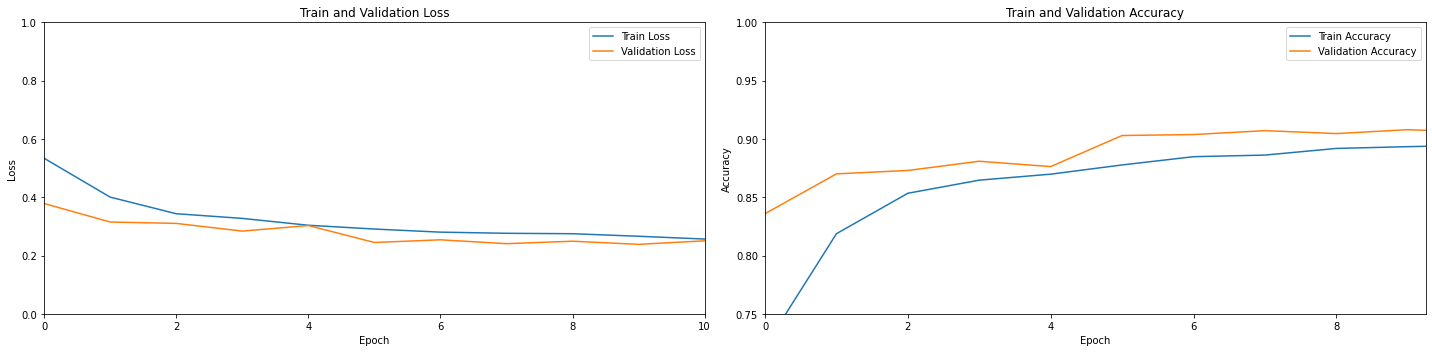

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model_3.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(test_data.classes, y_pred))

38/38 [==============================] - 6s 147ms/step
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1250
           1       0.95      0.81      0.88      1151

    accuracy                           0.89      2401
   macro avg       0.90      0.89      0.89      2401
weighted avg       0.90      0.89      0.89      2401



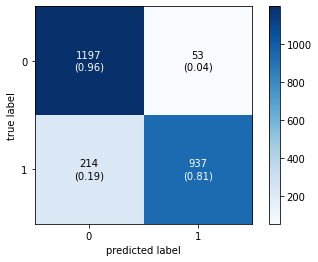

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(test_data.classes, y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()